In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pickle

import matplotlib.pyplot as plt
import numpy as np

from methods.paus import PAUS
from oracles.oracle import OperatorOracle
from oracles.point import OTProblemOracle
from utils.dataset import get_gaussian, load_mnist784
from utils.tm import get_2d_tm, get_1d_tm

In [4]:
np.random.seed(30)

# MNIST 784

In [52]:
digits = load_mnist784(4)

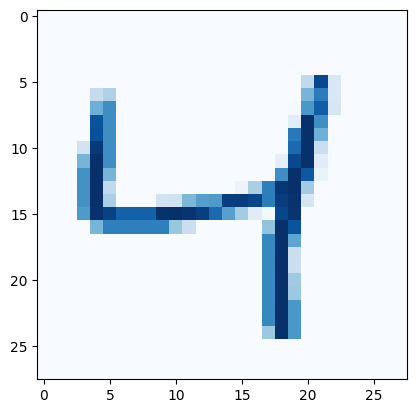

In [53]:
img = digits[0].reshape(28,28)

plt.imshow(img, cmap="Blues")

In [ ]:
d = len(digits[0])
d

# Gaussian

In [13]:
def get_method_gaussians(d: int, T: int) -> tuple[PAUS, float]:
    C = get_1d_tm(d)
    histograms, bar_true = get_gaussian(d, T)
    n = T // 4 * 3
    oracles = [OTProblemOracle(histograms[i], C) for i in range(T)]
    F, F1 = OperatorOracle(oracles, d, T), OperatorOracle(oracles, d, n)
    method = PAUS(F, F1, 1, 100, True, bar_true=bar_true)
    delta = 2 * (T - n) / T
    print(n, T, delta)

    return method, delta

In [17]:
method, delta = get_method_gaussians(10, 100)

75 100 0.5


In [18]:
z_star, history = method.fit(delta, 500)

[0.10010307 0.10003492 0.09998314 0.09994812 0.09993081 0.09993073
 0.09994809 0.09998314 0.10003491 0.10010307]
Iter: 0, Err: 0.09290465005298765
[4.10723729e-193 2.72671698e-152 3.12138934e-068 4.34639646e-004
 6.05879042e-073 5.91693928e-105 9.99565360e-001 4.10723729e-193
 4.10723729e-193 4.10723729e-193]
Iter: 10, Err: 0.05294919384701755
[7.51312170e-050 4.47429941e-139 9.83438298e-025 6.48514571e-119
 4.01884158e-153 4.01884158e-153 1.69424115e-059 1.00000000e+000
 1.73632775e-051 4.72254704e-029]
Iter: 20, Err: 0.10272811371271445
[3.51268049e-159 1.31971157e-141 1.00000000e+000 1.68625932e-175
 4.02032909e-040 4.43967351e-017 6.91641155e-029 1.36165437e-144
 3.99077004e-067 1.68625932e-175]
Iter: 30, Err: 0.10109979503626525
[3.42548783e-141 1.38576393e-122 3.42548783e-141 1.04414758e-062
 1.74527020e-054 1.00000000e+000 3.42548783e-141 1.43761753e-052
 1.12021925e-111 1.44489085e-073]
Iter: 40, Err: 0.028002712168060676
[8.47415607e-091 6.28949762e-142 6.28793274e-142 3.32720

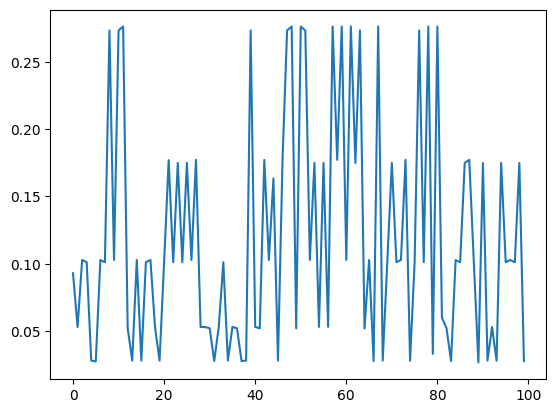

In [19]:
plt.plot(history["err"])

In [ ]:
import pickle

In [ ]:
with open(f"paus_gaussian_history.pkl", "wb") as f:
    pickle.dump(history, f)
with open(f"paus_gaussian_z.pkl", "wb") as f:
    pickle.dump(z_star, f)